# Problem 1
Include file clms.txt

In [1]:
import numpy as np
import scipy.stats as sts
import requests
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
health_data = np.loadtxt("clms.txt")
health_data

array([361.65, 123.04, 541.77, ...,  97.43, 186.88, 119.19])

In [3]:
print("Mean is:", health_data.mean())
print("Max is:", health_data.max())
print("Min is:", health_data.min())
print("Variace is:", health_data.var())
print(len(health_data))

Mean is: 720.2779753272437
Max is: 227967.25
Min is: 0.01
Variace is: 15782057.321363809
10619


<IPython.core.display.Javascript object>


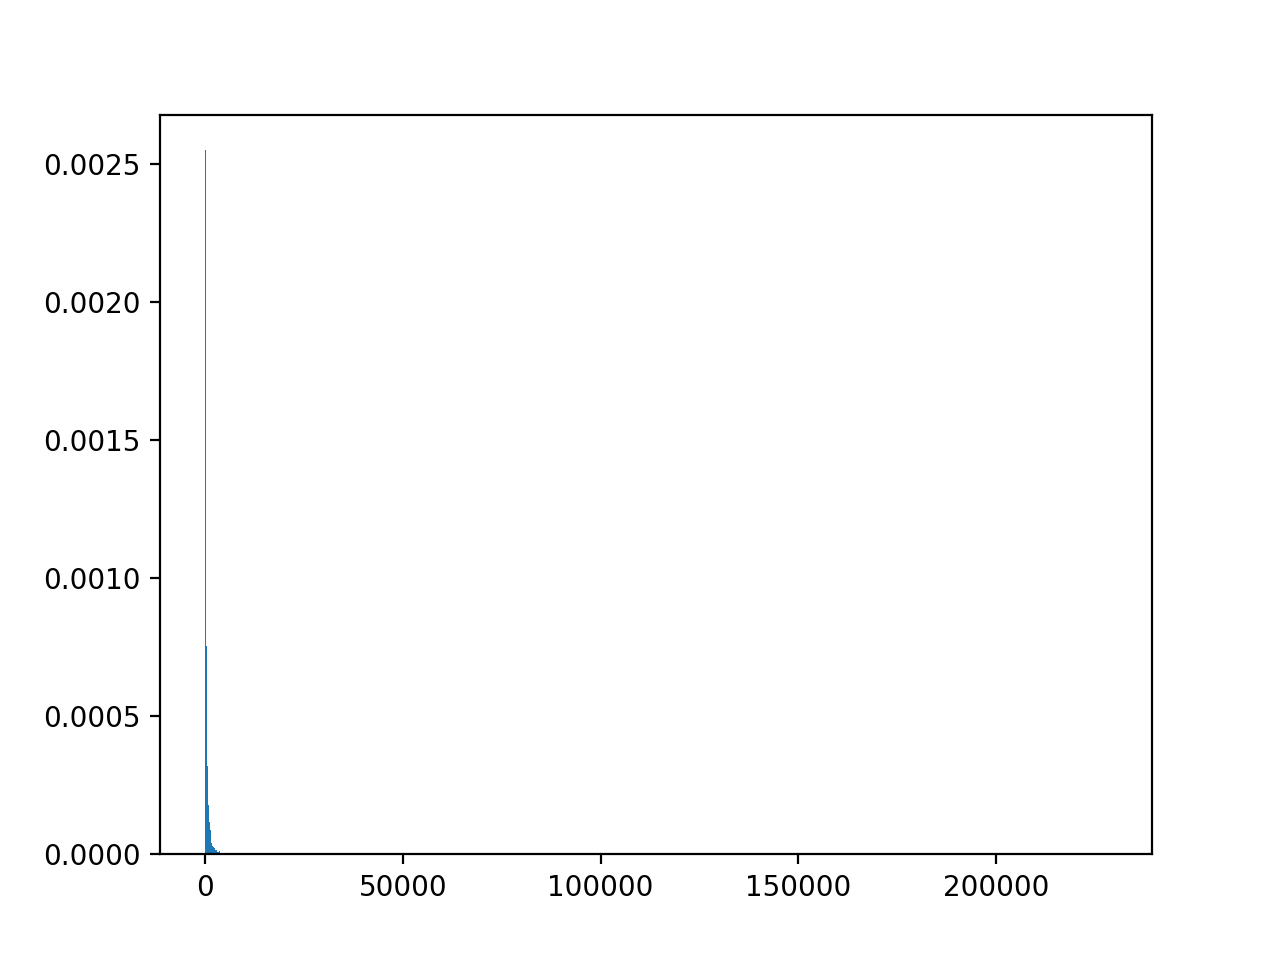

1.0000000000000009


In [83]:
%matplotlib notebook
a,b,c = plt.hist(health_data, 1000, density = True)
print( sum(np.diff(b)*a))

Observe that since the max is around 220000, we can barely see anything from this histgram.

In [5]:
bins = np.arange(0, 801, 8)
print(bins)
#we create an array that specifies 100 consecutive intervals from 0 to 800

[  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136
 144 152 160 168 176 184 192 200 208 216 224 232 240 248 256 264 272 280
 288 296 304 312 320 328 336 344 352 360 368 376 384 392 400 408 416 424
 432 440 448 456 464 472 480 488 496 504 512 520 528 536 544 552 560 568
 576 584 592 600 608 616 624 632 640 648 656 664 672 680 688 696 704 712
 720 728 736 744 752 760 768 776 784 792 800]


0.125


<IPython.core.display.Javascript object>


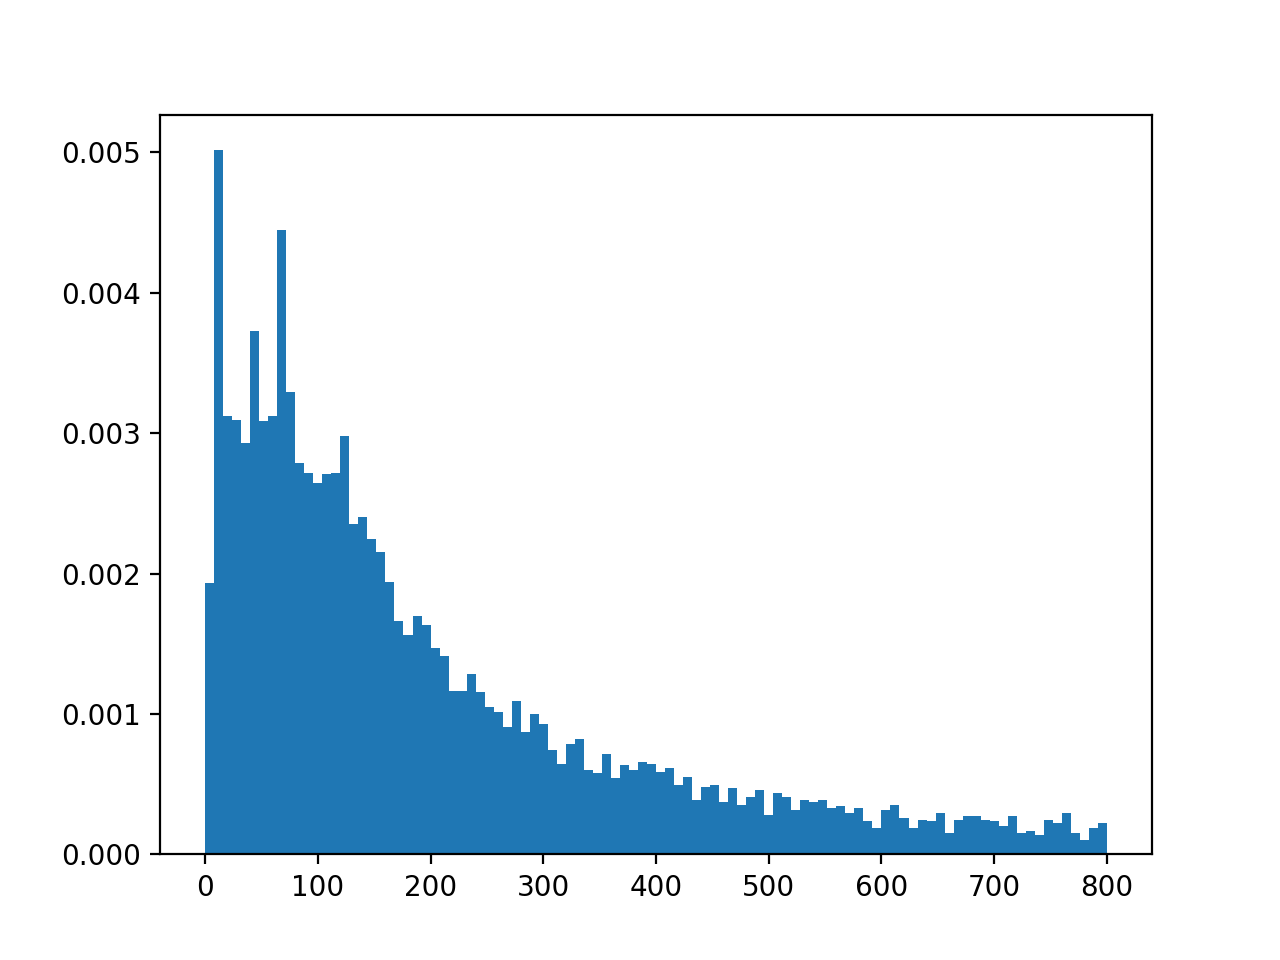

Area under histogram:  0.8494208494208922


In [85]:
weights = 1/len(health_data)/8 * np.ones(len(health_data))
print(weights.sum())
%matplotlib notebook
a, b, c = plt.hist(health_data, bins, weights = weights)
print("Area under histogram: ", sum(np.diff(b)*a))

The second histogram is preferred. Since there are only a few people with really high expediture, the first histogram cannot fully demonstrate the distribution.

# fit the data with a gamma distribution

In [118]:
#fit the data with a gamma distribution
from scipy.special import gamma

def gamma_density(x, alpha, beta):
    return 1.0 / ((beta ** alpha) * gamma(alpha)) * x **(alpha-1) * np.exp(-x/beta)


#set initial guess
beta_guess = health_data.var()/health_data.mean()
alpha_guess = health_data.mean() / beta_guess



print(gamma_density(20, alpha_guess, beta_guess))
print(np.log(gamma_density(20, alpha_guess, beta_guess)))
print(gamma_density(40, alpha_guess, beta_guess))
print(np.log(gamma_density(40, alpha_guess, beta_guess)))

0.0013284635750526466
-6.62373221124142
0.0006789205237036964
-7.295006486293617


In [113]:
import scipy.optimize as opt
def log_likelihood_GA(alpha, beta, datapoints):
    #return the sum of log likelihood across a bunch of samples
    density_vector = gamma_density(datapoints, alpha, beta)
    log_density = np.log(density_vector)
    return log_density.sum()

def crit_GA(param_vec, args):
    #args is datapoints
    alpha = param_vec[0]
    beta = param_vec[1]
    return -log_likelihood(alpha, beta, args)
init_guess = np.array([alpha_guess, beta_guess])

#print(crit(init_guess, health_data))

#results_mle = opt.minimize(crit, init_guess, args = (health_data))
results_GA = opt.minimize(crit_GA, init_guess, args=(health_data),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
results_GA

      fun: 82076.45160566256
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.        , 0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([2.21755323e-01, 2.19110647e+04])

In [88]:
alpha_GA, beta_GA = results_GA.x

<IPython.core.display.Javascript object>


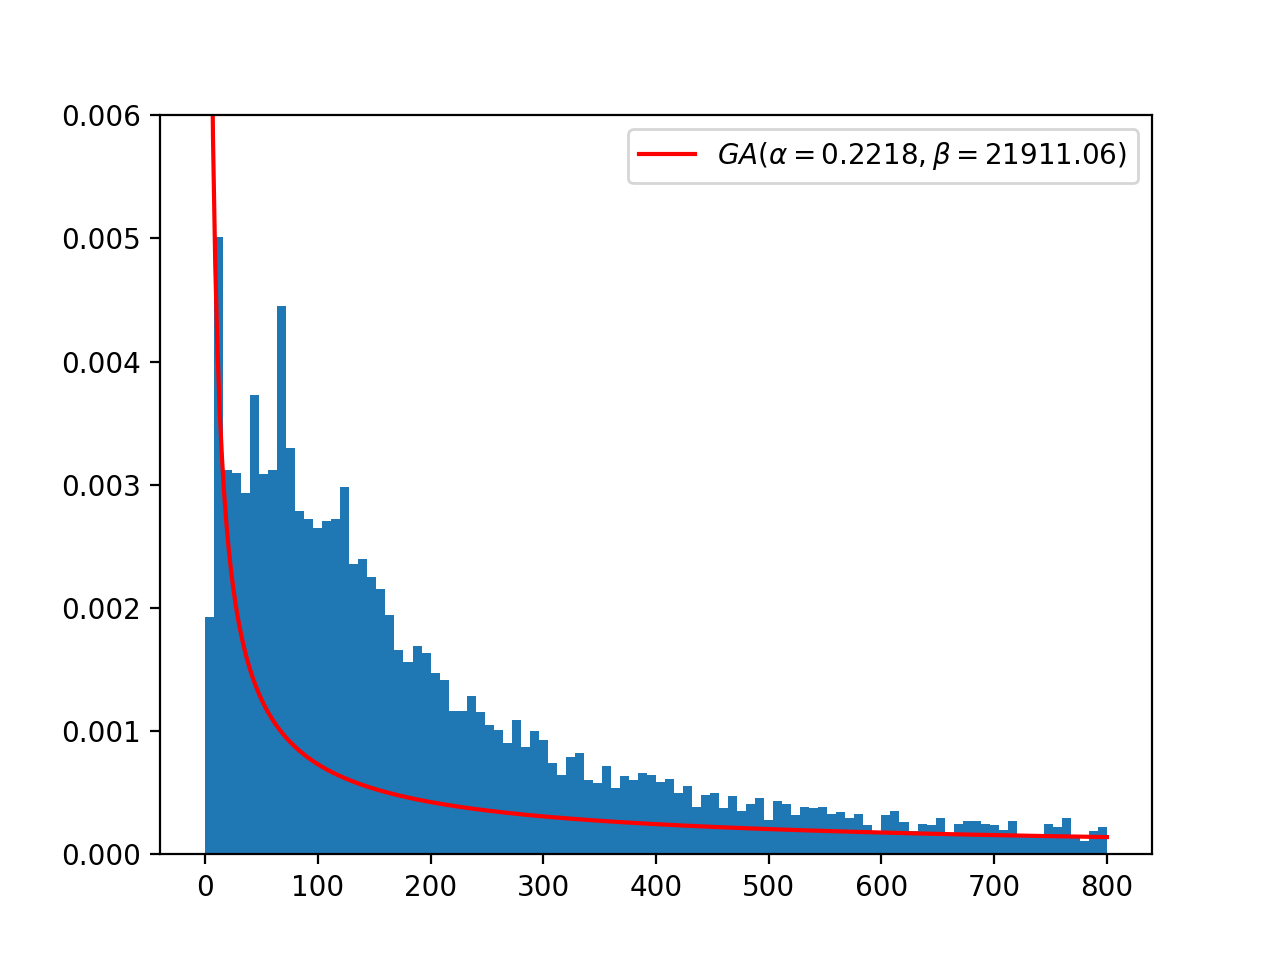

In [131]:
#draw the distribution on the second histogram
x_vals = np.linspace(1, 800, 400)

%matplotlib notebook
a, b, c = plt.hist(health_data, bins, weights = weights)
plt.plot(x_vals, gamma_density(x_vals, alpha_mle, beta_mle), "r", label = r'$GA(\alpha = 0.2218, \beta = 21911.06)$')
plt.ylim(0,0.006)
plt.legend()

In [29]:
print("The maximum log likelihood of this gamma distribution is ", -results_GA.fun)

The maximum log likelihood of this gamma distribution is  -82076.45160566256


# fit the data with generalized gamma distribution

In [107]:
#fit the data with generalized gamma distribution

def generalized_gamma_density(x, alpha, beta, m):
    return m / ((beta ** alpha) * gamma(alpha/m)) * x **(alpha-1) * np.exp(-(x/beta)**m)

def log_likelihood_GG(alpha, beta, m, datapoints):
    #return the sum of log likelihood across a bunch of samples
    density_vector = generalized_gamma_density(datapoints, alpha, beta, m)
    log_density = np.log(density_vector)
    return log_density.sum()

def crit_GG(param_vec, args):
    #args is datapoints
    alpha = param_vec[0]
    beta = param_vec[1]
    m = param_vec[2]
    return -log_likelihood_GG(alpha, beta, m, args)

init_guess_GG = np.array([alpha_GA, beta_GA, 1])

results_GG = opt.minimize(crit_GG, init_guess_GG, args=(health_data),
                       method='L-BFGS-B', bounds=((1e-8, None), (1e-8, None), (1e-8, None)))
results_GG

      fun: 82076.44679141791
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.62633727,  0.09167707, -1.0462827 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([2.21737737e-01, 2.19110644e+04, 9.97090605e-01])

<IPython.core.display.Javascript object>


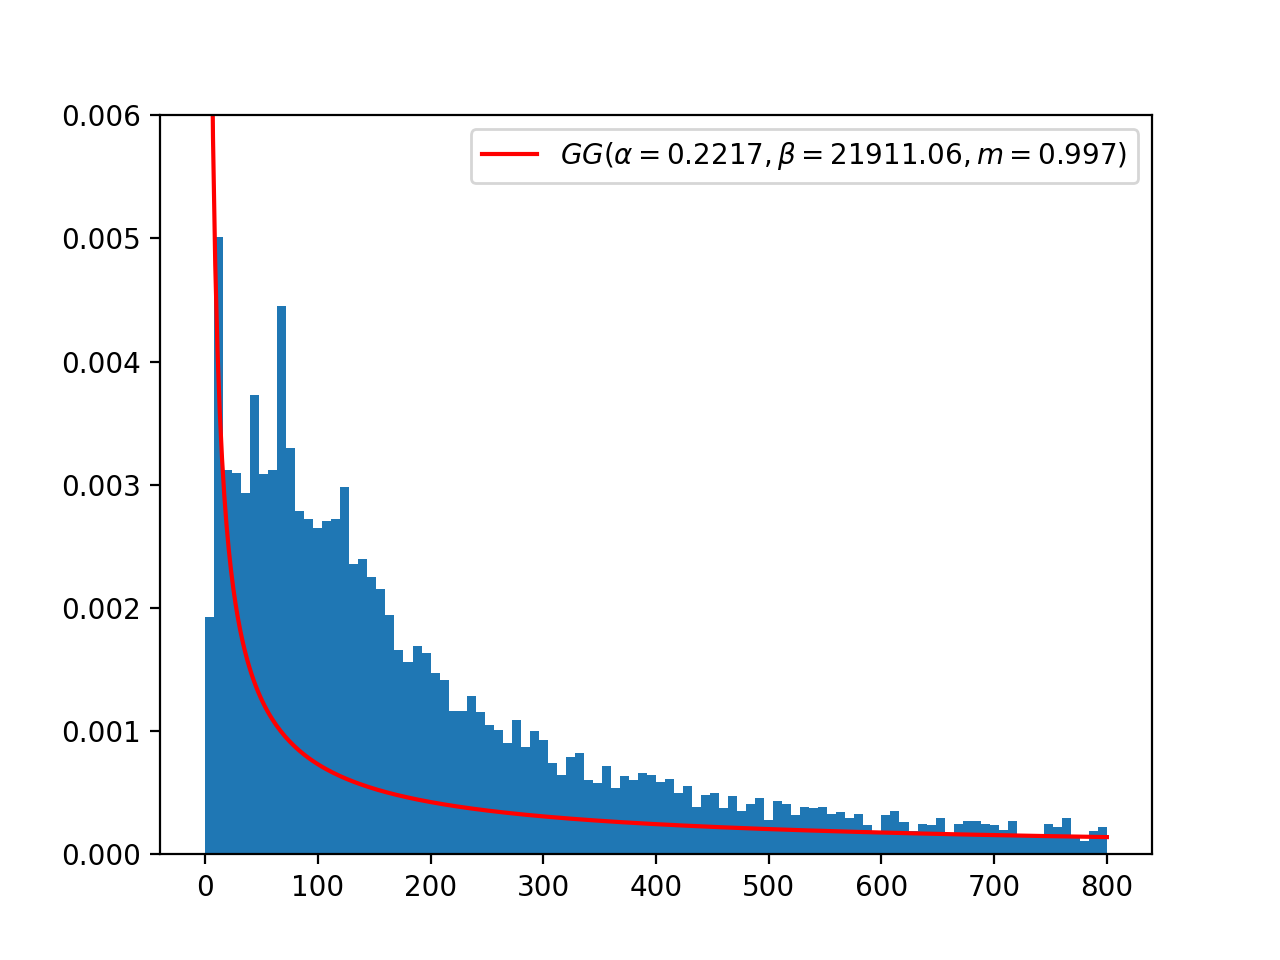

In [130]:
alpha_GG, beta_GG, m_GG = results_GG.x
%matplotlib notebook
a, b, c = plt.hist(health_data, bins, weights = weights)
plt.plot(x_vals, generalized_gamma_density(x_vals, alpha_GG, beta_GG, m_GG), "r", label = r'$GG(\alpha = 0.2217, \beta = 21911.06, m=0.997)$')
plt.ylim(0,0.006)
plt.legend()
plt.show()

In [134]:
print("The maximum log likelihood of this generalized gamma distribution is ", -results_GG.fun)

The maximum log likelihood of this generalized gamma distribution is  -82076.44679141791


# fit with GB2 distribution

In [126]:
#fit with GB2 distribution
from scipy.special import beta
def GB2_density(x, a, b, p, q):
    fenzi = a*x**(a*p-1)
    fenmu = (b**(a*p))*beta(p,q)*((1+(x/b)**a)**(p+q))
    
    return fenzi / fenmu
   
def log_likelihood_GB2(a,b,p,q,datapoints):
    #return the sum of log likelihood across a bunch of samples
    density_vector = GB2_density(datapoints, a, b, p, q)
    log_density = np.log(density_vector)
    return log_density.sum()

def crit_GB2(param_vec, args):
    #args is datapoints
    a = param_vec[0]
    b = param_vec[1]
    p = param_vec[2]
    q = param_vec[3]
    return -log_likelihood_GB2(a,b,p,q,args)

GB2_guess = np.array([m_GG, 200**(1/m_GG)*beta_GG, alpha_GG / m_GG, 200])

results_GB2 = opt.minimize(crit_GB2, GB2_guess, args=(health_data),
                       method='L-BFGS-B', bounds=((1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None)))
results_GB2

      fun: 74877.02833905544
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.80520864e+03,  0.00000000e+00, -1.16284355e+01,  4.17203410e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 665
      nit: 80
   status: 0
  success: True
        x: array([1.05785115e-01, 4.45048776e+06, 5.33504101e+01, 1.54323383e+02])

<IPython.core.display.Javascript object>


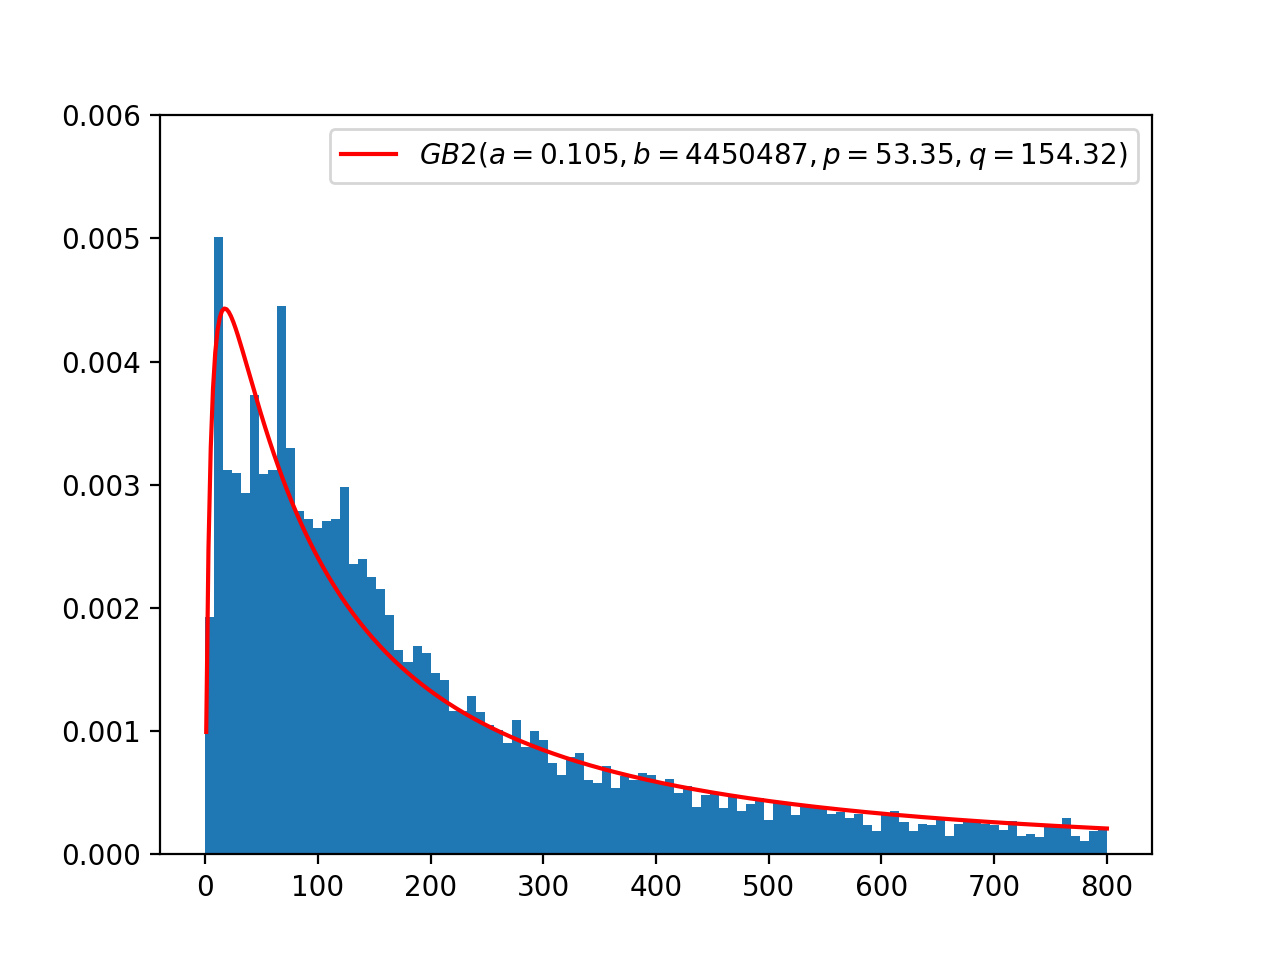

In [133]:
a_GB2, b_GB2, p_GB2, q_GB2 = results_GB2.x
%matplotlib notebook
a, b, c = plt.hist(health_data, bins, weights = weights)
plt.plot(x_vals, GB2_density(x_vals, a_GB2, b_GB2, p_GB2, q_GB2), "r", label = r'$GB2(a=0.105, b=4450487, p=53.35, q=154.32)$')
plt.ylim(0,0.006)
plt.legend()

In [135]:
print("The maximum log likelihood of this geneeralized beta 2 distribution is ", -results_GB2.fun)

The maximum log likelihood of this geneeralized beta 2 distribution is  -74877.02833905544


# Perform a likelihood ratio test for MLE estimates of GA, GG against GB2


In [137]:
GA_likeli = -results_GA.fun
GG_likeli = -results_GG.fun
GB2_likeli = -results_GB2.fun
print("Log likelihood using different modes")
print("GA:    ", GA_likeli)
print("GG:    ", GG_likeli)
print("GB2:   ", GB2_likeli)

Log likelihood using different modes
GA:     -82076.45160566256
GG:     -82076.44679141791
GB2:    -74877.02833905544


$$ LR(\tilde{\theta}|\hat{\theta}_{MLE}) = 2\Bigl(\ln\ell(\hat{\theta}_{MLE}) - \ln\ell(\tilde{\theta})\Bigr) \sim \chi^2(p) $$

In [140]:
GA_test_score = 2 * (GB2_likeli - GA_likeli)
GG_test_score = 2 * (GB2_likeli - GG_likeli)
GA_pval = 1.0 - sts.chi2.cdf(GA_test_score, 4)
GG_pval = 1.0 - sts.chi2.cdf(GG_test_score, 4)
print('chi squared of H0 with 4 degrees of freedom p-value (Generalized Gamma Distribution) = ', GA_pval)
print('chi squared of H0 with 4 degrees of freedom p-value (Gamma Distribution) = ', GG_pval)


chi squared of H0 with 4 degrees of freedom p-value (Generalized Gamma Distribution) =  0.0
chi squared of H0 with 4 degrees of freedom p-value (Gamma Distribution) =  0.0


In [148]:
from scipy.integrate import quad
#Assume GB2 distribution
def model_GB2_pdf(x):
    return GB2_density(x, a_GB2, b_GB2, p_GB2, q_GB2)

def model_GA_pdf(x):
    return gamma_density(x, alpha_GA, beta_GA)


prob_under_GB2 = quad(model_GB2_pdf, 1000, np.inf)[0]
prob_under_GA = quad(model_GA_pdf, 1000, np.inf)[0]
print("Likelihood of spending more than $1000 in one month")
print("GB2 model:     ", prob_under_GB2)
print("GA model:      ", prob_under_GA)

Likelihood of spending more than $1000 in one month
GB2 model:      0.12889161504872845
GA model:       0.45195974447843174
